In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='NanumBarunGothic') 

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/세종시/26.세종시_거주기간.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   중분류        39 non-null     object 
 1   소분류        39 non-null     object 
 2   1년미만       39 non-null     float64
 3   1년~2년 미만   39 non-null     float64
 4   2년~4년 미만   39 non-null     float64
 5   4년~6년 미만   39 non-null     float64
 6   6년~10년 미만  39 non-null     float64
 7   10년 이상     39 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.6+ KB


In [6]:
df['1년~4년 미만'] = df['1년~2년 미만'] + df['2년~4년 미만']
df['장기거주자'] = df['4년~6년 미만'] + df['6년~10년 미만'] + df['10년 이상']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   중분류        39 non-null     object 
 1   소분류        39 non-null     object 
 2   1년미만       39 non-null     float64
 3   1년~2년 미만   39 non-null     float64
 4   2년~4년 미만   39 non-null     float64
 5   4년~6년 미만   39 non-null     float64
 6   6년~10년 미만  39 non-null     float64
 7   10년 이상     39 non-null     float64
 8   1년~4년 미만   39 non-null     float64
 9   장기거주자      39 non-null     float64
dtypes: float64(8), object(2)
memory usage: 3.2+ KB


In [8]:
df1 = df.drop(df[['중분류', '1년~2년 미만', '2년~4년 미만', '4년~6년 미만', '6년~10년 미만', '10년 이상']], axis = 1)
df1

,소분류,1년미만,1년~4년 미만,장기거주자
0,소계,10.3,43.1,46.6
1,조치원읍,9.3,15.2,75.5
2,면지역,8.8,13.0,78.2
3,동지역,11.0,58.1,31.0
4,남자,10.8,42.9,46.3
5,여자,9.8,43.4,46.8
6,13~19세,6.2,43.8,50.0
7,20~29세,24.5,45.2,30.4
8,30~39세,12.4,54.7,32.9
9,40~49세,7.6,48.9,43.4


In [9]:
df_res = df1[13:17]
df_res

,소분류,1년미만,1년~4년 미만,장기거주자
13,초졸이하,3.1,24.4,72.6
14,중졸,5.3,28.9,65.9
15,고졸,11.3,36.7,52.0
16,대학이상,12.4,52.8,34.9


In [10]:
df_res.set_index('소분류',inplace = True)
df_res

,1년미만,1년~4년 미만,장기거주자
소분류,,,
초졸이하,3.1,24.4,72.6
중졸,5.3,28.9,65.9
고졸,11.3,36.7,52.0
대학이상,12.4,52.8,34.9


Text(0, 0.5, '교육 수준')

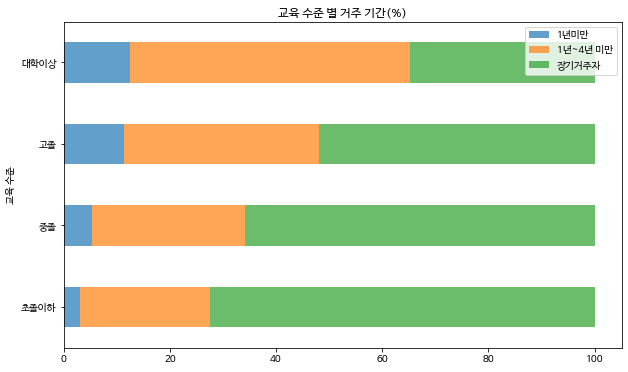

In [12]:
df_res.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.title('교육 수준 별 거주 기간(%)')
plt.ylabel('교육 수준')
# plt.xticks(rotation = 0 )